<h1><center> Inter IIT Tech Meet 2018 </center></h1>
<h2><center> Star Cluster Identifier </center></h1>

### The Final Problem!
You have been given a dataset for a globular cluster at a distance of 10.4 kpc from the solar system. The columns of the data are explained in the header of the text file. Read the dataset description very carefully. Throughout this problem you may assume a Kroupa (2001) Initial Mass Function (IMF)  for  single  stars to calculate the distribution of stars w.r.t mass, a  mass-luminosity  relation $L ∝ M^{3.8}$,  and $M_{606W, \odot}= 4.66$ and assume the magnitude in F606W band to be its bolometric magnitude (i.e. ignore bolometric corrections and extinction). You can also ignore the stars fainter that $m_{F606W} = 22$. Also assume that the cluster originally formed stars between $0.08M_{\odot}$ and $200M_{\odot}$, and ignore the effect of binaries. Display your calculations and approach through the code, since it determines some part of the credit.
#### Please note that the photometry of faint stars isn't precise, hence it is important to limit the range of magnitudes and color indices for real stars. Use the dataset to find the appropriate limits to make data interpretation easier.

Q1. Calculate the half-light radius of the cluster. Consider only the stars with probability of membership greater than 90%. Report your answer in light years

In [413]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Importing data and refining it
#Columns being used are caliberated photometric magnitudes in F275W, F336W, F438W, F606W, F814W; membership
#probability, RA and Dec
data = np.loadtxt('Dataset.txt', usecols=(2, 8, 14 , 20, 26, 32, 33, 34))

#Loading the identification numbers of the stars in a separate row
id_num = np.loadtxt('Dataset.txt', usecols=35, dtype=np.ndarray)

#Using data with membership probability > 90%. 
data_hlr= data[np.where(data[:, -3] >= 90)]
id_num = id_num[np.where(data[:, -3] >= 90)]

#Removing the stars for which magnitude measurements are saturated in any of the bands, and also ingoring fainter than 22 mags*
sat_ind = np.where(data_hlr[:,0:4] <= -99)
data_hlr = np.array(np.delete(data_hlr,sat_ind, axis=0))
id_num = np.array(np.delete(id_num,sat_ind, axis=0))
faint_ind = np.where(data_hlr[:,3] >=22)
data_hlr = np.array(np.delete(data_hlr,faint_ind, axis=0))
id_num = np.array(np.delete(id_num,faint_ind, axis=0))
#Computing centre of the cluster
RA = data_hlr[:,6]; Dec = data_hlr[:,7]
RA_centre = np.mean(RA); Dec_centre = np.mean(Dec)

#Computing Bolometric Magnitudes and Luminosities of all stars in the cluster. Sun's Bolometric magnitude is 4.66
M_606W = data_hlr[:,3] - 5*np.log10(10400/10); L_606W = 10**(-0.4*(M_606W - 4.66))
temp_RA= (RA - RA_centre)*np.cos(Dec_centre*np.pi/180); temp_Dec= Dec - Dec_centre # - cos delta factor*

#Computing the physical radius of the circle, i.e. distance to the farthest star from the centre
R_max = np.sqrt(max(np.abs(temp_RA))**2 + max(np.abs(temp_Dec)**2))
r_range = 10**(np.linspace(-20, np.log10(R_max), 1000))

#Total luminosity of the cluster
L_total = np.sum(L_606W)
R_halfLight = 0

#Iteratively finding the half light radius
for i in range(1000):
    ind = np.where(np.sqrt(np.abs(temp_RA)**2 + np.abs(temp_Dec)**2) < r_range[i])
    L_i = np.sum(L_606W[ind])
    if(L_i/L_total >=0.5):
        R_halfLight = r_range[i]
        break
        
R_halfLight = R_halfLight*(np.pi/180)*10400*3.26 
print(R_halfLight, 'Light Years')

7.05020289327 Light Years


##### Solution -: 
- Firstly load the data with the required columns as shown.   
- Then select only the stars (corresponding rows) with membership probability greater than 90%, and delete the stars which for which the magnitude measurements are saturated.   
- From the remaning stars, calculate the center of the cluster, (averaging the X and Y coordinates of the stars).   
- Compute the distance of the farthest star from the centre, this distance is named *R_max*.   
- Compute the Bolometric magnitudes of the stars using the apparent magnitudes given in the 606W band, and also compute the Luminosities of these stars w.r.t sun using the following standard relations.    

$\begin{align}
M_{F606W} &= m_{F606W} - 5\log\left(\frac{D}{10pc}\right) \\
\log\left(\frac{L_{star}}{L_{\odot}}\right) &= -0.4(M_{bol, star} - M_{bol, \odot})
\end{align}$
- Calculate *L_total*, which is the total luminosity of the cluster by summing the luminosities of the stars selected above
- While computing the distances using RA and Dec, incorporate the cos(Dec) factor to account for the effect of curvature of the coordinate system.
- Starting from the centre of the cluster, iteratively keep increasing the radius and compute the total luminosity of the stars in this circle. Keep checking at every iteration if the ratio of the luminosity at a radius *r* with that of *L_total* is less than half, and when it reaches half, stop the loop. 
- This radius *r* (in degrees) needs to be converted in radians, and needs to be corrected by a factor of $cos~\delta$, where $\delta$ is the declination of the centre of the cluster. Denote this this corrected angular radius to be $\theta_{hl}$
- The final half life radius R_{HalfLife} of the cluster is given by $ D \theta_{hl}$, where $D$ is the distance to the cluster. The Half life radius of the cluster is approximately 7 Light years. 

##### Grading Scheme (subject to change, will be updated instantly if any changes) -: 

- 6.8 - 7.2 Ly : Full Credit 
- 6 - 6.8 or 7.2-8 Ly : 50% Credit
- 0 otherwise
- 5 points for taking the cos(Dec) (or cos($\delta$) correction) and 5 points for removing the saturated stars 

Q2. Calculate the age of the cluster from its turn off point. Assume that the time spent by a star in the main sequence phase is proportional to ratio of its mass and luminosity. The main sequence lifetime of sun is 10 billion years. Report the turn off point magnitude as well as the estimated age of the cluster

In [387]:
def plotfig(data, counters=[], final_counter=[]):
    """Plot HR diagrams in different bands
    
    Inputs:
    data
    counters - possible counterparts
    final_counter - final counterpart
    """
    f, axarr = plt.subplots(2, 2, sharex='all', sharey='all', figsize=(12, 8))
    ax = axarr.reshape(4)
    f.suptitle("HR diagrams across different bands")
    ax[0].set_xlabel(r'$m_{F275W} - m_{F336W}$')
    ax[1].set_xlabel(r'$m_{F336W} - m_{F435W}$')
    ax[2].set_xlabel(r'$m_{F438W} - m_{F606W}$')
    ax[3].set_xlabel(r'$m_{F606W} - m_{F814W}$')
    ax[0].set_ylabel(r'$m_{F275W}$')
    ax[1].set_ylabel(r'$m_{F336W}$')
    ax[2].set_ylabel(r'$m_{F435W}$')
    ax[3].set_ylabel(r'$m_{F606W}$')
    for i in range(4):
        ax[i].set_xlim(-2, 5)
        ax[i].set_ylim(13, 26)
        ax[i].scatter(data_hlr[:, i] - data_hlr[:, i+1], data_hlr[:, i], c='k', s=0.1)
        if not counters == []:
            ax[i].plot(counters[:, i] - counters[:, i+1], counters[:, i], 'bo')
        if not final_counter == []:
            ax[i].plot(final_counter[i] - final_counter[i+1], final_counter[i], 'go')
    plt.minorticks_on()
    f.gca().invert_yaxis()
    plt.show()

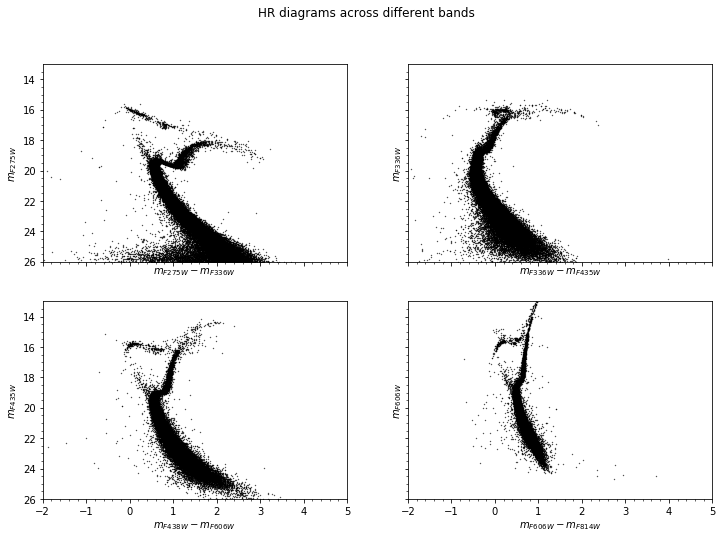

In [402]:
plotfig(data_hlr)

Turn off point is approximately at $m_{F606W} = 19$ (slightly lesser). Given a distance of 10.4 kpc:
\begin{align}
M_{F606W} = M_{bol, TO} &= m_{F606W} - 5\log\left(\frac{D}{10pc}\right), \\
                        &= 3.9 \pm 0.25. \\
\implies \log\left(\frac{L_{TO}}{L_{\odot}}\right) &= -0.4(M_{bol, TO} - M_{bol, \odot}). \\
                                                   &= 0.3 \pm 0.1. \\
            \implies L_{TO} &= (2.0 \pm 0.5)L_{\odot}.
\end{align}

\begin{align}
L &\propto M^{3.8}, \\
T_{MS} &\propto \frac{M}{L}, \\
       &\propto L^{-0.74}. \\
\implies \frac{T_{MS}}{T_{MS, \odot}} &= \left(\frac{L}{L_{\odot}}\right)^{-0.74}, \\
\implies T_{MS, TO} &= \left(\frac{L_{TO}}{L_{\odot}}\right)^{-0.74} T_{\odot}, \\
                    &= 6.0_{-1.0}^{+1.4}\ \mathrm{billion\ yrs}.
\end{align}

##### Grading Scheme (subject to change, will be updated instantly if any changes) -: 

   
- $m_{F606W}$ between and 18.7 - 19.4 : 8 points
- age of the cluster between 5 - 9 Billion years : 12 points.


Q3. Based on the number of subgiant stars in the cluster and the Kroupa (2001) IMF (and only these two), estimate the timescale between main-sequence turn off and the beginning of the red giant branch at the turn-off point.

##### Kroupa IMF
\begin{align}
\xi(M) dM &= \xi_0 \left(\frac{M}{M_{\odot}}\right)^{-2.3} \frac{dM}{M_{\odot}}\ \ \ M > 0.5M_{\odot}, \\
\end{align}

##### Step 1: Calculate $\xi_0$

Using the $m_{F06W}$ v.s $m_{F606W} - m_{F814W}$ CMD since that has the least scatter. From the previous problem we had that the $L_{TO} = (2 \pm 0.5)L_{\odot} \implies M_{TO} = (1.2 \pm 0.1) M_{\odot}$. To be conservative, use only the number of stars upto $1.2M_{\odot}$ to calculate $\xi_0$

Now, as stated in the question the maximum magnitude star I will be considering is $m_{F606W} = 22 \implies M_{F606W} = 6.9 \implies L_{min} = 0.13L_{\odot} \implies M_{min} = 0.58M_{\odot}$

From the Kroupa IMF, the number of stars between $0.58M_{\odot}$ and $1.2M_{\odot}$ is
\begin{align}
N_{0.58-1.3} &= \int_{0.58M_{\odot}}^{1.2M_{\odot}} \xi_0 \left(\frac{M}{M_{\odot}}\right)^{-2.3} \frac{dM}{M_{\odot}} \\
             &= -\frac{\xi_0}{1.3} \left[\left(\frac{M}{M_{\odot}}\right)^{-1.3}\right]_{0.58M_{\odot}}^{1.2M_{\odot}} \\
             &= 0.95\xi_0
\end{align}
The number of stars in between $0.58M_{\odot}$ and $1.2M_{\odot}$ from data is the number of stars with $m_{F606W}$ between 19 and 22.

In [412]:
num_stars = len(np.where(np.logical_and(data_hlr[:, 3] >= 19, data_hlr[:, 3] <= 22))[0])
print(num_stars/0.95)

52944.210526315794


##### Step 2: Derive expression to calculate the lifetime in sub gaint phase
Assume that the life time of the subgaint phase is much smaller that the main-sequence lifetime (i.e $T_{SG} << T_{MS}$) . Thus, we can say that all the stars at the subgaint phase have same mass and have left the main sequence after roughly same age T_{MS}. Also, the number of stars in the subgaint phase ($N_{SG}$) is the number of stars that have main sequence lifetime between $T_{GC} - T_{SG}$ and $T_{GC}$. Thus number of stars in subgiant phase ($N_{SG}$) is

\begin{align}
N_{SG} &= \left[\frac{dN}{dT_{MS}}\right]_{TO} T_{SG}, \\
       &= \left[\frac{dN}{dM}\frac{dM}{dT_{MS}}\right]_{TO} T_{SG}, \\
       &= \xi(M_{TO})\left[\frac{dM}{dT_{MS}}\right]_{TO} T_{SG},
\end{align}

where subscript $TO$ is used to indicate the values at turn off point. Since we know that the mass of the stars at the turn off is more than $0.5M_{\odot}$, we only need to use the first equality in the Kroupa IMF

\begin{align}
T_{MS} &\propto M^{-2.8} \\
\implies T_{MS} &= T_{\odot}\left(\frac{M}{M_{\odot}}\right)^{-2.8}, \\
\implies \frac{dT_{MS}}{dM} &= -2.8\frac{T_{\odot}}{M_{\odot}}\left(\frac{M}{M_{\odot}}\right)^{-3.8}, \\
                            &= -2.8\frac{T_{\odot}}{M_{\odot}} \frac{L_{\odot}}{L}, \\
\implies \frac{dM}{dT_{MS}} &= -\frac{1}{2.8}\frac{M_{\odot}}{T_{\odot}} \frac{L}{L_{\odot}}, \\
\implies N_{SG} &= -\frac{1}{2.8}\xi (M_{TO})M_{\odot} \frac{T_{SG}}{T_{\odot}} \frac{L_{TO}}{L_{\odot}}, \\
\implies N_{SG} &= -\frac{1}{2.8}\xi _0 \frac{T_{SG}}{T_{\odot}}\left(\frac{M_{TO}}{M_{\odot}}\right)^{-2.3} \frac{L_{TO}}{L_{\odot}}, \\
\implies N_{SG} &= -\frac{1}{2.8} \xi _0 \frac{T_{SG}}{T_{\odot}}\left(\frac{L_{TO}}{L_{\odot}}\right)^{0.39}, \\
\implies T_{SG} &= 2.8T_{\odot}\left(\frac{N_{SG}}{\xi _0 }\right)\left(\frac{L_{TO}}{L_{\odot}}\right)^{-0.39}
\end{align}

##### Step 3: Calculate the number of stars in subgaint phase.
Ysing the $m_{F06W}$ v.s $m_{F606W} - m_{F814W}$ CMD since it will be easy to define stars in subgaint phase in this plot.
To select stars in the subgiant phase, use the following constraints.
1. 18.0 < $m_{F606W}$ < 18.75
2. 0.4 < $m_{F606W} - m_{F814W}$ < 0.8 (The upper limit seems to be higher but that will not make any difference.)

In [390]:
num_sg = len(np.where(np.logical_and(np.logical_and(data_hlr[:, 3] >= 18., data_hlr[:, 3] <= 18.75),
                                     np.logical_and(data_hlr[:, 3] - data_hlr[:, 4] > 0.4, 
                                                    data_hlr[:, 3] - data_hlr[:, 4] < 0.8)))[0])
print("Number of stars in SG phase = ", num_sg)
print("Lifetime of subgiant phase = ", 2.8*10*num_sg/num_stars*0.95*2**(-1.5/3.8), " billion yrs")

Number of stars in SG phase =  3225
Lifetime of subgiant phase =  1.2477623100665514  billion yrs


##### Grading Scheme (subject to change, will be updated instantly if any changes) -: 

 - Thus the value of $\xi _0 = 5.2 \times 10^4$. Values between $(4.5 - 7.2) \times 10^4$ are acceptable. 5 marks for calculating the correct $\xi_0$.    
 - 15 marks for getting the correct expression for time spent in the sub giant phase.    
 - 5 marks for calulcating the number of stars in subgiant phase (an error of about a factor of 2 is acceptable).   
 - 10 marks for getting it all together and arriving at the correct final answer. 

Q4. Observing the same cluster in X ray gives us quite a few prominent X ray sources. Find the optical counterparts corresponding to the following X ray sources in the cluster -: 

| S. no.      | RA$^{\circ}$ |Dec$^{\circ}$|  Error Radius$^{\circ}$  |
|-------------|--------------|-------------|--------------------------|
|   1         | 205.5407     |  28.3798    |   1e-4                   |   
|   2         | 205.5729     |  28.359     |   4.4e-4                 |


**Solution -:** For every source try to find the stars in the error radius around that source. To ascertain that which of these stars is the X ray source, the optical counter part to the X ray source, plot all the stars on the HR diagram, to see that which of these stars is off the main sequence. Most of the optical counterparts are the binary companions of the X-ray sources( usually compact objects i.e neutron stars and black holes). 
This leads to excess heating due to emission from the compact objects. Therefore they are hotter i.e bluer than stars of similar mass i.e luminosity, which can be seen clearly in the HR diagrams corresponding to color indices for lower wavelengths, e.g. in the $m_{275W}$ vs $m_{275W} - m_{336W}$ diagram. Hence, the star in the error circle which does not lie on the main sequence is the optical counterpart to the X ray source in question. The data has been carefully chosen that you get only 1 such star in the error circle around either of the X ray sources! You can use the code given for Q2 to plot a particular star (row of the dataset) on the HR diagram.

##### Grading Scheme (subject to change, will be updated instantly if any changes) -: 
S. no 1 - Optical counterpart is 'R0006439' : 15 points   
S. no 2 - Optical counterpart is 'R0033520' : 15 points


In [414]:

RA_X = np.array([205.5407, 205.5729])
Dec_X = np.array([28.3798, 28.359])

#Mag1 and Mag2 are the arrays of magnitudes of the corresponding optical counterpart as given in the paper, 
#done as a check to verify if we get the correct star.
mag_1 = np.array([18.02, 17.88, 18.81, 18.05, 17.37])
mag_2 = np.array([22.08, 22.13, 22.06, 21.32, 20.30])
norm_arr1 = np.linalg.norm(mag_1 - data_hlr[:,0:5], axis = 1)
norm_arr2 = np.linalg.norm(mag_2 - data_hlr[:,0:5], axis = 1)

#Finding optical counterparts using the data given in the problem and comparing with HR diagrams
#We then compare the answer we get by checking the candidates on the HR diagram for deviation from the main sequence
# ind1 = np.where(np.sqrt((np.cos(Dec_X[0]*np.pi/180)*(RA_X[0] - RA))**2 + (Dec_X[0] - Dec)**2) <= 1e-4)
# ind2 = np.where(np.sqrt((np.cos(Dec_X[1]*np.pi/180)*(RA_X[1] - RA))**2 + (Dec_X[1] - Dec)**2) <= 4.4e-4)

ind1 = np.where(np.sqrt((RA_X[0] - RA)**2 + (Dec_X[0] - Dec)**2) < 1e-4)
ind2 = np.where(np.sqrt((RA_X[1] - RA)**2 + (Dec_X[1] - Dec)**2) < 4.4e-4)

print('Optical counterpart using magnitudes for S1', id_num[np.argmin(norm_arr1)])
print('Optical counterpart using magnitudes for S2', id_num[np.argmin(norm_arr2)])

print('Candidates for optical counterpart of S1', id_num[ind1])
print('Candidates for optical counterpart of S2', id_num[ind2])

Optical counterpart using magnitudes for S1 R0006439
Optical counterpart using magnitudes for S2 R0033520
Candidates for optical counterpart of S1 ['R0006439' 'R0121638' 'R0121640']
Candidates for optical counterpart of S2 ['R0033520' 'R0033521']


/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


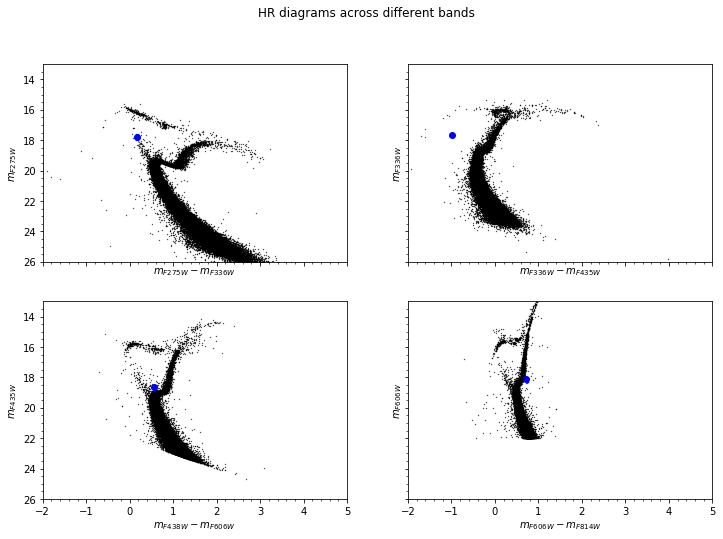

In [422]:
#Example code for plotting a star on the hR diagram 
#Plotting the optical counterpart for S1 - to plot the other 2 candidates use ind1[0][1] and ind1[0][2], to see
#that they clearly lie on the the main sequence
plotfig(data_hlr, np.reshape(data_hlr[ind1[0][0],:],[1,8]))

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


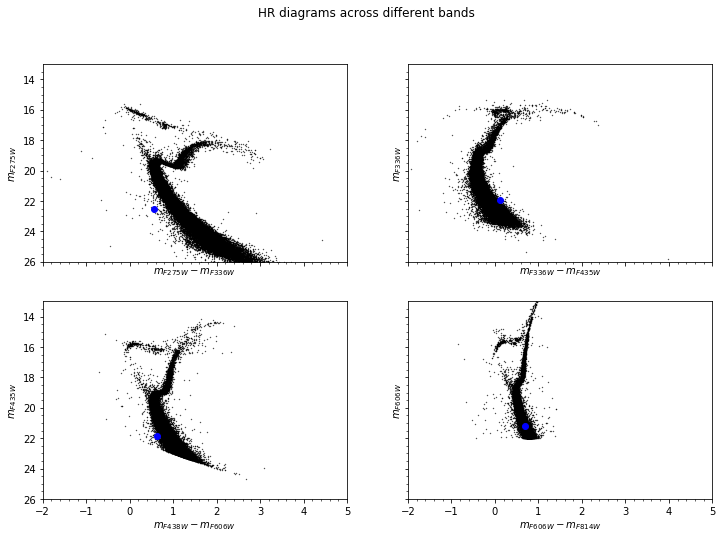

In [393]:
#Plotting the optical counterpart for S2 - to plot the other 2 candidates use ind2[0][0] and ind2[0][2], to see
#that they clearly lie on the the main sequence
plotfig(data_hlr, np.reshape(data_hlr[ind2[0][1],:],[1,8]))

**The dataset has been taken from the [Mikulski archive for space telescopes](https://archive.stsci.edu/prepds/hugs/) for the cluster M3. The data for X ray sources in this cluster sources has been taken from a paper on [Identifications of Faint Chandra Sources in the Globular Cluster M3](https://arxiv.org/pdf/1812.05130.pdf). You were asked to identify CX1 and CX6.**

The idea for this problem was the brain child of [Pavan Hebbar](https://sites.ualberta.ca/~hebbar/), a former manager of IITB's astronomy Club. Sincere thanks to him for leading me to the datasets and helping me out immensely with the problems and the solutions. Since the marking is quite objectve, we plan to finish the grading and evaluation by tonight. Do let me know if you find any discrepancies in the solutions before 5:30 PM, after which we will freeze the solutions.


Yours Truly,   
[Chinmay Talegaonkar](https://chinmay0301.github.io/)